In [1]:
import os
import pandas as pd
DATA_PATH = "Data/"

def load_group_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "GroupedData.csv")
    return pd.read_csv(csv_path)

In [2]:
group_data = load_group_data()
group_data.head()

,Id,Data,User
0,1064,0.4739,G
1,1064,0.6793,G
2,1064,0.3509,G
3,1064,0.4166,G
4,1064,0.4700,G


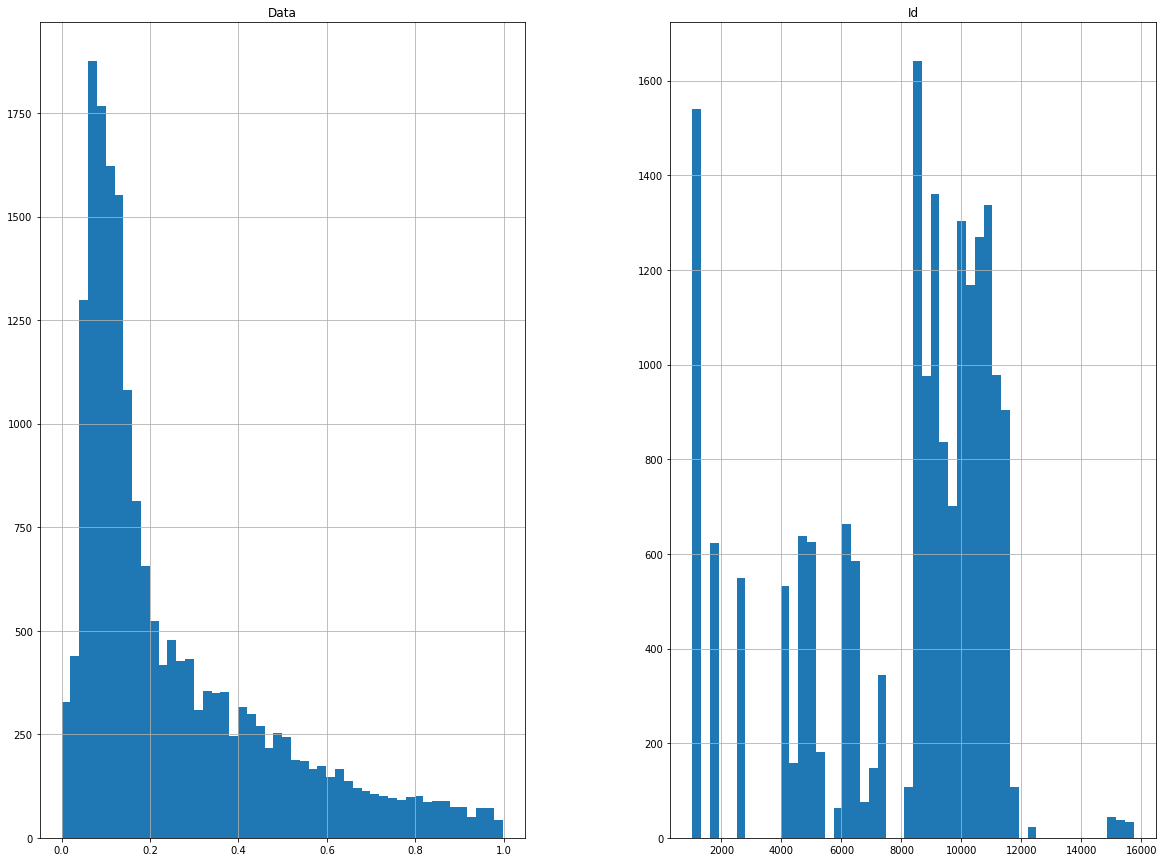

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
group_data.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(group_data, test_size = 0.2, random_state=2)

In [5]:
print(len(train_set), "train +", len(test_set), "test")

15644 train + 3912 test


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 7198 to 2575
Data columns (total 3 columns):
Id      15644 non-null int64
Data    15644 non-null float64
User    15644 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 488.9+ KB


In [9]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

all_x = group_data[['Id', 'Data']].values
all_y = group_data[['User']].values
all_y = np.ravel(all_y)

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="poly", degree=2, coef0=1, C=5, verbose=True)),
))

svm_scores = cross_val_score(svm_clf, all_x, all_y, cv=5, verbose=True, n_jobs=5)
svm_scores.mean()

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   21.5s remaining:   32.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   25.2s finished


0.5935775373219784

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=32)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=20)
forest_scores.mean()

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.externals import joblib
svm_clf.fit(all_x, all_y)
joblib.dump(svm_clf, 'svm.joblib')